In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calplot

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the Wonderful Wines of the World data

data = pd.read_csv(r'C:\Users\frede\Documents\GitHub\BC2_Predict_Cancellations\data\H2.csv') 
data.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [24]:
non_metric_features = data[['CustomerType','DepositType','Meal','ReservationStatus']]

Text(0.5, 1.0, 'Class Distributions \n (0: Not Canceled || 1: Canceled)')

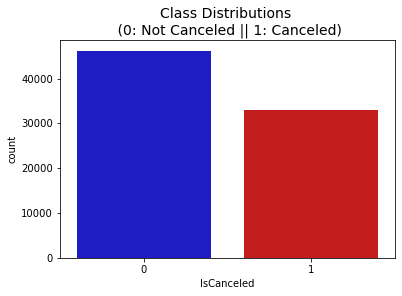

In [5]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('IsCanceled', data=data, palette=colors)
plt.title('Class Distributions \n (0: Not Canceled || 1: Canceled)', fontsize=14)

In [6]:
#The previous visualization confirms that we don't have a heavily Imablanced Dataset

In [7]:
data.ADR.describe()

count    79330.000000
mean       105.304465
std         43.602954
min          0.000000
25%         79.200000
50%         99.900000
75%        126.000000
max       5400.000000
Name: ADR, dtype: float64

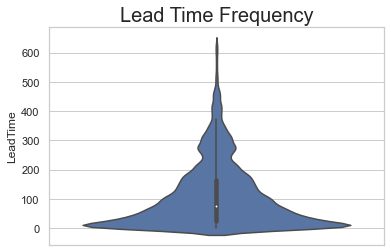

In [8]:
sns.set(style = 'whitegrid')
sns.violinplot(y=data["LeadTime"])
plt.title('Lead Time Frequency', fontsize = 20)
plt.show()

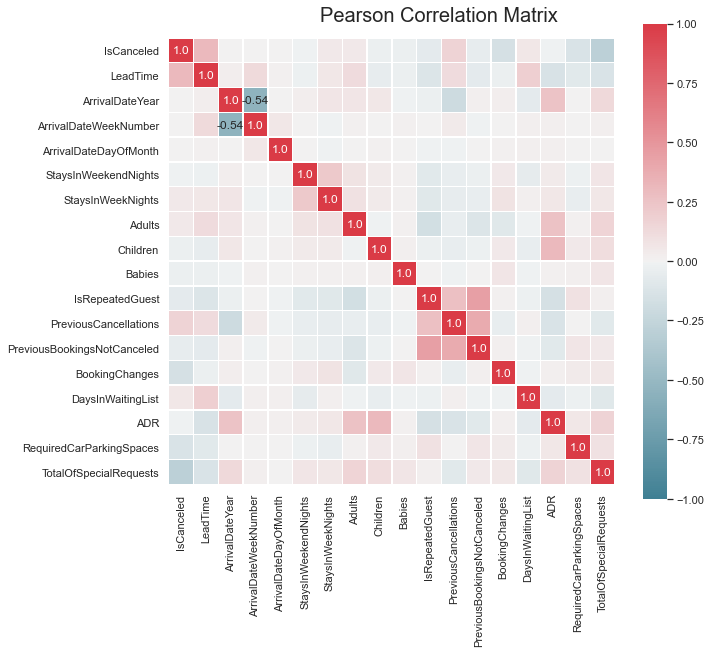

In [9]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=20)

plt.show()

### Visualize the weight of the dependent variable in categorical data

In [10]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    


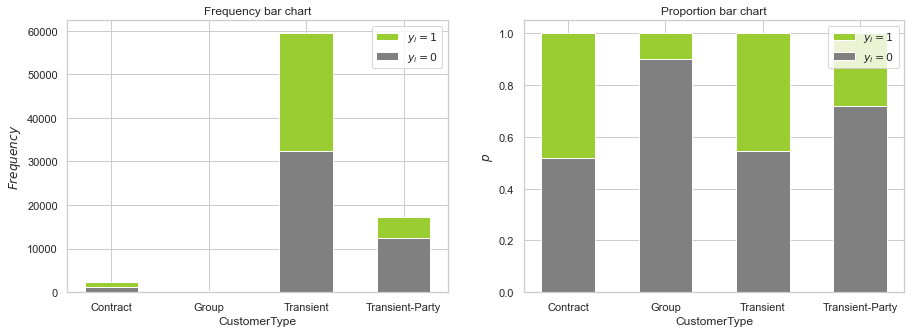

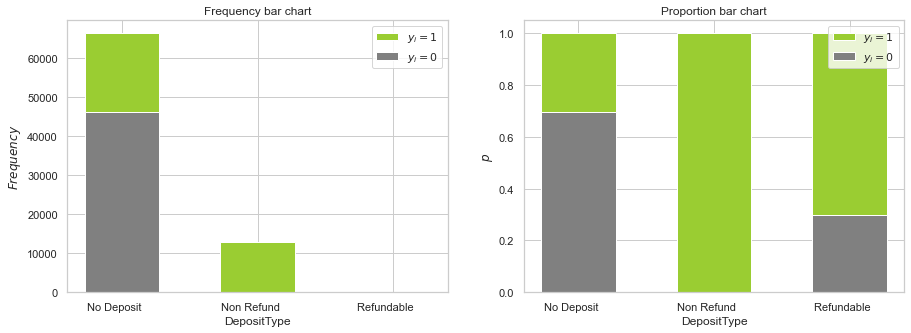

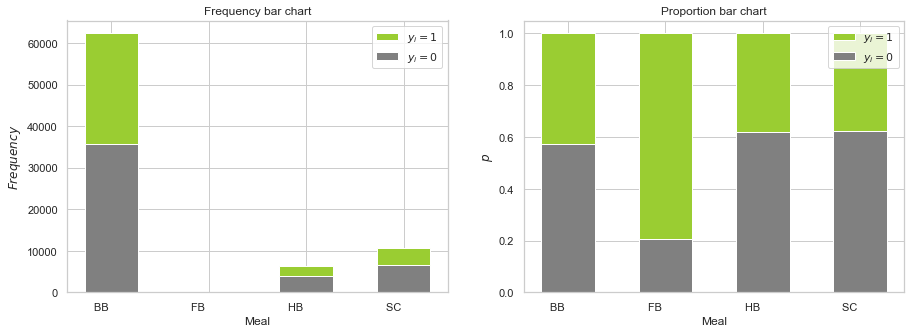

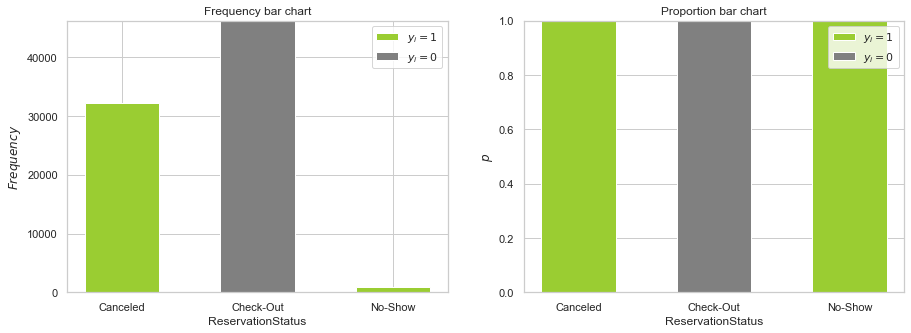

In [25]:
for var in non_metric_features:
    bar_charts_categorical(data, var , "IsCanceled")

In [12]:
data['Agent'].value_counts()[:10].index.tolist()

['          9',
 '       NULL',
 '          1',
 '         14',
 '          7',
 '          6',
 '         28',
 '          3',
 '          8',
 '         37']

In [21]:
data.groupby('ArrivalDateYear').size()

ArrivalDateYear
2015    13682
2016    38140
2017    27508
dtype: int64

In [33]:
data.groupby('ArrivalDateMonth').size().sort_values(ascending=False)

ArrivalDateMonth
August       8983
May          8232
July         8088
June         7894
October      7605
April        7480
September    7400
March        6458
February     4965
November     4357
December     4132
January      3736
dtype: int64

In [34]:
data['ArrivalDate'] = data['ArrivalDateDayOfMonth'].astype(str)+'/'+data['ArrivalDateMonth']+'/'+data['ArrivalDateYear'].astype(str)

In [35]:
data['ArrivalDate'] = pd.to_datetime(data['ArrivalDate'])

In [57]:
events

2020-11-26    0.050114
2019-06-03   -0.428501
2019-10-21    1.497892
2019-01-24   -0.305524
2019-04-21   -1.641527
                ...   
2020-10-30   -1.217548
2020-05-07    0.159731
2019-02-23   -0.420575
2019-08-06   -0.618155
2020-05-24    1.649283
Length: 500, dtype: float64

In [73]:
events = data[['ArrivalDate']]
events['foo'] = events.apply(lambda _: '1', axis=1)
events

,ArrivalDate,foo
0,2015-07-01,1
1,2015-07-01,1
2,2015-07-01,1
3,2015-07-01,1
4,2015-07-01,1
...,...,...
79325,2017-08-01,1
79326,2017-08-01,1
79327,2017-08-01,1
79328,2017-08-01,1


In [76]:
d = events.groupby('ArrivalDate').size()

In [70]:
events.set_index('ArrivalDate', inplace=True)

In [72]:
events

,foo
ArrivalDate,
2015-07-01,1
2015-07-01,1
2015-07-01,1
2015-07-01,1
2015-07-01,1
...,...
2017-08-01,1
2017-08-01,1
2017-08-01,1


In [71]:
calplot.calplot(events)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [61]:
data

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03,2015-07-01
1,1,88,2015,July,27,1,0,4,2,0.0,...,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30,2015-07-01
3,1,92,2015,July,27,1,2,4,2,0.0,...,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23,2015-07-01
4,1,100,2015,July,27,2,0,2,2,0.0,...,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-01
79326,0,102,2017,August,35,31,2,5,3,0.0,...,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-01
79327,0,34,2017,August,35,31,2,5,2,0.0,...,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-01
79328,0,109,2017,August,35,31,2,5,2,0.0,...,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-01
